# Определение перспективного тарифа для телеком компании "Мегалайн"

## Описание проекта:
Компания «Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, Коммерческому департаменту нужно определить, какой тариф приносит больше денег. Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. В распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Содержание
1. [Шаг 1. Файлы с данными, изучение общей информации](#start)
    * [1.1 Таблица users (информация о пользователях)](#step1.1)
    * [1.2 Таблица calls (информация о звонках)](#step1.2)
    * [1.3. Таблица messages (информация о сообщениях)](#step1.3)
    * [1.4. Таблица internet (информация об интернет-сессиях)](#step1.4)
    * [1.5. Таблица tariffs (информация о тарифах)](#step1.5)
2. [Шаг 2. Подготовка данных](#step2)
    * [2.1 Перевод данных к нужным типам](#step2.1)
    * [2.2 Исправление ошибок в данных](#step2.2)
    * [2.3 Подсчет для каждого пользователя: количество сделанных звонков и израсходованных минут разговора по месяцам; количество отправленных сообщений по месяцам; объем израсходованного интернет-трафика по месяцам; помесячная выручка с каждого пользователя](#step2.3)
3. [Шаг 3. Анализ данных. Поведение клиентов оператора, исходя из выборки. Количество минут разговора, сообщений и объём интернет-трафика используемых пользователям каждого тарифа в месяц. Среднее количество, дисперсия и стандартное отклонение.
Гистограммы и описание распределения.](#step3)
4. [Шаг 4. Проверка гипотез: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается; средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.](#step4)
5. [Шаг 5. Общий вывод](#step5)

### Описание тарифов:
#### Тариф «Смарт»:
* Ежемесячная плата: 550 рублей
* Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
    * минута разговора: 3 рубля
    * сообщение: 3 рубля
* 1 Гб интернет-трафика: 200 рублей
    
#### Тариф «Ультра»:
* Ежемесячная плата: 1950 рублей
* Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
    * минута разговора: 1 рубль
    * сообщение: 1 рубль
* 1 Гб интернет-трафика: 150 рублей

Примечание: «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

<a id="start"></a>
## Шаг 1. Файлы с данными, изучение общей информации

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# путь к 5 файлам:
users = pd.read_csv('/datasets/users.csv')
calls = pd.read_csv('/datasets/calls.csv')
messages = pd.read_csv('/datasets/messages.csv')
internet = pd.read_csv('/datasets/internet.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')

In [3]:
# смотрим общую информацию по каждой таблице:
for data in [users, calls, messages, internet, tariffs]:
    print(data.info(), end='\n\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), obje

<a id="step1.1"></a>
### 1.1 Users - таблица пользователей

In [4]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [5]:
# начальный месяц регистрации:

min_month = users['reg_date'].values.astype('datetime64[M]').min()
min_month

numpy.datetime64('2018-01')

In [6]:
# максимальный месяц регистрации:

max_month = users['reg_date'].values.astype('datetime64[M]').max()
max_month

numpy.datetime64('2018-12')

In [7]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Проверим, все ли пользователи уникальные:

In [8]:
print("Кол-во строк в таблице users:", users.shape[0])
print("Количество уникальных пользователей:", users['user_id'].count())
print("Наличие дубликатов:", users.duplicated().sum())

Кол-во строк в таблице users: 500
Количество уникальных пользователей: 500
Наличие дубликатов: 0


In [9]:
# проверяем пропуски:
users.isnull().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

Пропуски только в столбце churn_date, их довольно много. Смотрим описание задачи: "churn_date - дата прекращения пользования тарифом (если значение пропущено, то значит тариф ещё действовал на момент выгрузки данных)". Оставим данные в этом столбце как есть - для решения поставленной задачи они не нужны.

Необходимо изменить тип данных:

reg_date - на datetime

Необходимо добавить следующие столбцы:

месяц

<a id="step1.2"></a>
### 1.2 Calls - звонки

In [10]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [11]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


202607 строк данных. Данные полные, без пропусков.

Необходимо изменить тип данных:

call_date - на datetime.

<a id="step1.3"></a>
### 1.3 Messages - смс сообщения

In [12]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [13]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


123036 строк данных. Данные полные, без пропусков.

Необходимо изменить тип данных:

id - на int

message_date - на datetime.

<a id="step1.4"></a>
### 1.4 Internet - интернет

In [14]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [15]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


149396 строк. Данные полные, без пропусков.

Необходимо изменить тип данных:

session_date - на datetime.

<a id="step1.5"></a>
### 1.5 Tariffs - тарифы

In [16]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [17]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Данные по тарифам как справочная информация.

### Основные выводы по Шагу 1:
Получили следующие 5 таблиц:
- 1. Таблица Users (информация о пользователях)
- 2. Таблица Calls (информация о звонках)
- 3. Таблица Messages (информация о сообщениях)
- 4. Таблица Internet (информация об интернет-сессиях)
- 5. Таблица Tariffs (информация о тарифах)

Названия и перевод столбцов в таблицах:

1.Таблица users (информация о пользователях):
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана

2.Таблица calls (информация о звонках):
* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок

3.Таблица messages (информация о сообщениях):
* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение

4.Таблица internet (информация об интернет-сессиях):
* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя

5.Таблица tariffs (информация о тарифах):
* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

<a id="step2"></a>
## Шаг 2. Подготовка данных

* Перевод данных к нужным типам;
* Исправление ошибок в данных.

Пояснить, какие ошибки найдены и как исправили. Длительность многих звонков — 0.0 минут. Это могут быть пропущенные звонки. Обрабатывать ли эти нулевые значения, как их отсутствие повлияет на результаты анализа.

Подсчет для каждого пользователя:
* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам;
* помесячная выручка с каждого пользователя (вычтим бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножаем на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану).

<a id="step2.1"></a>
### Приведем данные к нужным типам:

#### 2.1 Users

In [18]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

In [19]:
users.dtypes

user_id                int64
age                    int64
churn_date    datetime64[ns]
city                  object
first_name            object
last_name             object
reg_date      datetime64[ns]
tariff                object
dtype: object

#### 2.2 Calls

In [20]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

# после проверки, по совету Алексея в столбце id не нужно менять тип данных на int, оставить как строка

In [21]:
calls.dtypes

id                   object
call_date    datetime64[ns]
duration            float64
user_id               int64
dtype: object

#### 2.3 Messages

In [22]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

In [23]:
messages.dtypes

id                      object
message_date    datetime64[ns]
user_id                  int64
dtype: object

#### 2.4 Internet

In [24]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

In [25]:
internet.dtypes

Unnamed: 0               int64
id                      object
mb_used                float64
session_date    datetime64[ns]
user_id                  int64
dtype: object

#### 2.5 Tariffs

In [26]:
tariffs.dtypes

messages_included         int64
mb_per_month_included     int64
minutes_included          int64
rub_monthly_fee           int64
rub_per_gb                int64
rub_per_message           int64
rub_per_minute            int64
tariff_name              object
dtype: object

<a id="step2.2"></a>
### Исправляем ошибки в данных:

В таблице Calls  строим гистограмму по столбцу длительность звонка в минутах:

Text(0, 0.5, 'количество')

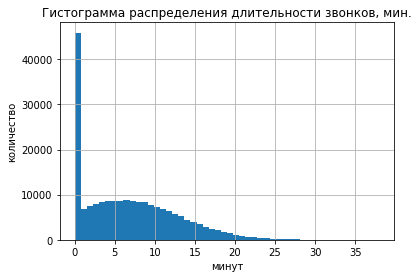

In [27]:
calls_hist = calls['duration'].plot(kind='hist', bins=50, grid=True,
                                    title='Гистограмма распределения длительности звонков, мин.')
calls_hist.set_xlabel('минут')
calls_hist.set_ylabel('количество')

Очень много звонков с нулевой длительностью. Это возможно пропущенные, несостоявшиеся звонки. Нулевая их длительность вызвана прерыванием связи или случаями, когда у другого абонента было "занято", "не доступен" и поэтому происходил моментальный сброс вызова после дозвона. Согласно примечанию, «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута. Округляем в большую сторону вверх до минуты все звонки при
помощи np.ceil Звонки с 0 минутой не расходуют лимиты минут и не принимают участия в формировании конечной выручки, поэтому удаляем эти строки. 

In [28]:
# Округляем в большую сторону вверх до минуты все звонки при помощи np.ceil:

calls['duration'] = calls['duration'].apply(np.ceil).astype('int')

# после проверки, по совету Алексея, поменял тип данных на int

In [29]:
# заменяем нули на пропуски и удаляем эти строки:

calls['duration'] = calls['duration'].replace(0, np.NaN)
calls = calls.dropna()

Text(0, 0.5, 'количество')

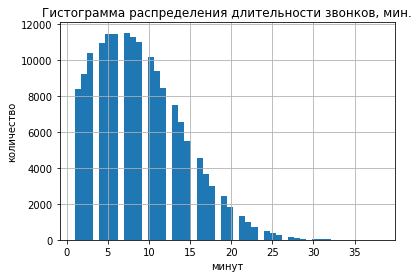

In [30]:
# проверяем:
calls_hist = calls['duration'].plot(kind='hist', bins=50, grid=True,
                                    title='Гистограмма распределения длительности звонков, мин.')
calls_hist.set_xlabel('минут')
calls_hist.set_ylabel('количество')

#### Исправляем также ошибки в таблице Интернет использование интернет-трафика:

Text(0, 0.5, 'Количество')

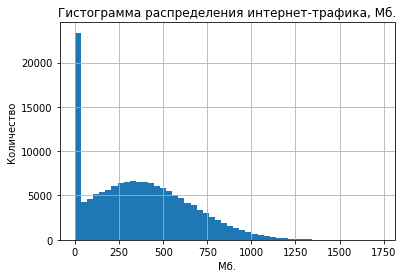

In [31]:
# смотрим гистограмму интернет-трафика:

int_hist = internet['mb_used'].plot(kind='hist', bins=50, grid=True,
                                    title='Гистограмма распределения интернет-трафика, Мб.')
int_hist.set_xlabel('Мб.')
int_hist.set_ylabel('Количество')

In [32]:
# Согласно примечанию «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду,
# в тарифе засчитывается целая минута. Округляем в большую сторону вверх до минуты все интернет-трафики при
# помощи np.ceil:

internet['mb_used'] = internet['mb_used'].apply(np.ceil)

In [33]:
# заменяем нули на пропуски и удаляем эти строки:

internet['mb_used'] = internet['mb_used'].replace(0, np.NaN)
internet = internet.dropna()

Text(0, 0.5, 'Количество')

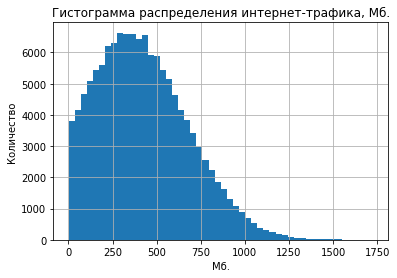

In [34]:
# проверяем:

int_hist = internet['mb_used'].plot(kind='hist', bins=50, grid=True,
                                    title='Гистограмма распределения интернет-трафика, Мб.')
int_hist.set_xlabel('Мб.')
int_hist.set_ylabel('Количество')

<a id="step2.3"></a>
### Подсчет для каждого пользователя:
* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам;
* помесячная выручка с каждого пользователя (вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану).

Добавим в таблице Users столбец месяц:

In [35]:
users['month'] = pd.DatetimeIndex(users['reg_date']).month

Добавим в таблице Calls столбец месяц:

In [36]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month

#### Таблица "Количество сделанных звонков и израсходованных минут разговора по месяцам":

In [37]:
calls_month = calls.groupby(['user_id', 'month'])[['duration']].agg(['count', 'sum']).reset_index()

In [38]:
calls_month.columns = ['user_id','month','calls_count', 'calls_sum']

In [39]:
# смотрим кол-во строк в таблице

len(calls_month)

3168

In [40]:
# Таблица "Количество сделанных звонков и израсходованных минут разговора по месяцам":

calls_month

,user_id,month,calls_count,calls_sum
0,1000,5,17,159.0
1,1000,6,28,172.0
2,1000,7,41,340.0
3,1000,8,42,408.0
4,1000,9,46,466.0
...,...,...,...,...
3163,1498,10,30,247.0
3164,1499,9,8,70.0
3165,1499,10,44,449.0
3166,1499,11,62,612.0


#### Таблица "Количество отправленных сообщений на каждого клиента по месяцам":

In [41]:
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

In [42]:
month_messages = messages.groupby(['user_id', 'month'])[['id']].count().reset_index()

In [43]:
month_messages.columns = ['user_id','month','sms_count']

In [44]:
# Таблица "Количество отправленных сообщений на каждого клиента по месяцам":
month_messages

,user_id,month,sms_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


#### Таблица "Объем израсходованного интернет-трафика на каждого клиента по месяцам":

In [45]:
internet['month'] = pd.DatetimeIndex(internet['session_date']).month

In [46]:
month_internet = internet.groupby(['user_id', 'month'])[['mb_used']].sum().reset_index()

In [47]:
month_internet.columns = ['user_id','month','internet']

In [48]:
# Таблица "Объем израсходованного интернет-трафика на каждого клиента по месяцам":
month_internet

,user_id,month,internet
0,1000,5,2256.0
1,1000,6,23257.0
2,1000,7,14016.0
3,1000,8,14070.0
4,1000,9,14581.0
...,...,...,...
3196,1498,10,20604.0
3197,1499,9,1848.0
3198,1499,10,17809.0
3199,1499,11,17984.0


#### Теперь создаем из предыдущих трех таблиц одну Общую Таблицу "Количество сделанных звонков и израсходованных минут разговора, количество отправленных сообщений, объем израсходованного интернет-трафика на каждого клиента по месяцам":

In [49]:
report = calls_month.merge(month_messages,how='outer',on=['user_id','month'])

# после проверки, по совету Алексея, чтобы не терять данные объединяем через how = outer (внешняя общая область)

In [50]:
report.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3212 entries, 0 to 3211
Data columns (total 5 columns):
user_id        3212 non-null int64
month          3212 non-null int64
calls_count    3168 non-null float64
calls_sum      3168 non-null float64
sms_count      2717 non-null float64
dtypes: float64(3), int64(2)
memory usage: 150.6 KB


In [51]:
report = report.merge(month_internet,how='outer',on=['user_id','month'])

In [52]:
# создадим датайфрейм из таблицы Users с информацией по users_id, тарифу и городу:

users_tariff_city = users[['user_id', 'tariff', 'city']]
users_tariff_city.columns = ['user_id', 'tariff_name', 'city']

In [53]:
report = report.merge(users_tariff_city,how='left',on=['user_id'])

# после проверки, по совету Алексея, чтобы остались данные только основного отчета объединяем через how = left

In [54]:
# добавим данные из таблицы Tariffs с информацией по тарифу:

report = report.merge(tariffs,how='left',on=['tariff_name'])

### Общая Таблица "Количество минут разговора, отправленных сообщений, интернет-трафика на каждого клиента с данными по тарифу по месяцам":

In [55]:
# Таблица "Количество сделанных звонков и израсходованных минут разговора,
# количество отправленных сообщений, объем израсходованного интернет-трафика на каждого клиента по месяцам":
report

,user_id,month,calls_count,calls_sum,sms_count,internet,tariff_name,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,17.0,159.0,22.0,2256.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
1,1000,6,28.0,172.0,60.0,23257.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
2,1000,7,41.0,340.0,75.0,14016.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
3,1000,8,42.0,408.0,81.0,14070.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
4,1000,9,46.0,466.0,57.0,14581.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,10,NaN,NaN,21.0,19588.0,smart,Санкт-Петербург,50,15360,500,550,200,3,3
3210,1489,11,NaN,NaN,20.0,17516.0,smart,Санкт-Петербург,50,15360,500,550,200,3,3
3211,1489,12,NaN,NaN,35.0,17341.0,smart,Санкт-Петербург,50,15360,500,550,200,3,3
3212,1240,2,NaN,NaN,NaN,961.0,ultra,Воронеж,1000,30720,3000,1950,150,1,1


In [56]:
# посмотрим и подсчитаем пропуски:
report.isnull().sum()

user_id                    0
month                      0
calls_count               46
calls_sum                 46
sms_count                497
internet                  13
tariff_name                0
city                       0
messages_included          0
mb_per_month_included      0
minutes_included           0
rub_monthly_fee            0
rub_per_gb                 0
rub_per_message            0
rub_per_minute             0
dtype: int64

Пропуски есть в столбцах calls_count, calls_sum, sms_count и internet. Видимо, некоторые из пользователей за рассматриваемый период времени в какой то месяц не звонили, не отправляли СМС, не выходили в интернет. Поэтому проставим в этих пропусках нули, которые будут означать, что в конкретном месяце данный клиент не использовал какой то вид услуг:

In [57]:
report = report.fillna(0)

In [58]:
# проверяем:

report.isnull().sum()

user_id                  0
month                    0
calls_count              0
calls_sum                0
sms_count                0
internet                 0
tariff_name              0
city                     0
messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
dtype: int64

### Теперь посчитаем помесячную выручку с каждого пользователя (вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана; и прибавим абонентскую плату, соответствующую тарифному плану):

In [59]:
# создадим функцию для добавления столбца кол-во минут разговора превысивший бесплатный лимит:

def min_calls_over(row):
    if row['tariff_name'] == 'smart' and row['calls_sum'] > row['minutes_included']:
         return row['calls_sum'] - row['minutes_included']
    elif row['tariff_name'] == 'ultra' and row['calls_sum'] > row['minutes_included']:
         return row['calls_sum'] - row['minutes_included']
    else:
         return 0
    
report['calls_over'] = report.apply(min_calls_over, axis=1)

In [60]:
# создадим функцию для добавления столбца кол-во СМС превысивший бесплатный лимит:
def rep_sms_over(row):
    if row['tariff_name'] == 'smart' and row['sms_count'] > row['messages_included']:
         return row['sms_count'] - row['messages_included']
    elif row['tariff_name'] == 'ultra' and row['sms_count'] > row['messages_included']:
         return row['sms_count'] - row['messages_included']
    else:
         return 0
    
report['sms_over'] = report.apply(rep_sms_over, axis=1)

In [61]:
# создадим функцию для добавления столбца кол-во Инернет-трафика превысивший бесплатный лимит:

def rep_internet_over(row):
    if row['tariff_name'] == 'smart' and row['internet'] > row['mb_per_month_included']:
         return row['internet'] - row['mb_per_month_included']
    elif row['tariff_name'] == 'ultra' and row['internet'] > row['mb_per_month_included']:
         return row['internet'] - row['mb_per_month_included']
    else:
         return 0
    
report['internet_over'] = report.apply(rep_internet_over, axis=1)

In [62]:
# проверяем общую таблицу:
report.head(10)

,user_id,month,calls_count,calls_sum,sms_count,internet,tariff_name,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,calls_over,sms_over,internet_over
0,1000,5,17.0,159.0,22.0,2256.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
1,1000,6,28.0,172.0,60.0,23257.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
2,1000,7,41.0,340.0,75.0,14016.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
3,1000,8,42.0,408.0,81.0,14070.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
4,1000,9,46.0,466.0,57.0,14581.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
5,1000,10,44.0,350.0,73.0,14717.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
6,1000,11,37.0,338.0,58.0,14768.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
7,1000,12,38.0,333.0,70.0,9827.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
8,1001,11,45.0,430.0,0.0,18452.0,smart,Москва,50,15360,500,550,200,3,3,0.0,0.0,3092.0
9,1001,12,47.0,414.0,0.0,14053.0,smart,Москва,50,15360,500,550,200,3,3,0.0,0.0,0.0


### Итоговая Таблица с помесячной выручкой с каждого пользователя :

In [63]:
# функция для расчета и добавления столбца с помесячной выручкой с каждого пользователя:

def rep_month_revenue(row):
    sum_per_month = 0
    if row['tariff_name'] == 'smart':
        sum_per_month += row['rub_monthly_fee']
        sum_per_month += row['calls_over'] * row['rub_per_minute']
        sum_per_month += row['sms_over'] * row['rub_per_message']
        sum_per_month += row['internet_over']/1024 * row['rub_per_gb']
        return sum_per_month
    else:
        sum_per_month += row['rub_monthly_fee']
        sum_per_month += row['calls_over'] * row['rub_per_minute']
        sum_per_month += row['sms_over'] * row['rub_per_message']
        sum_per_month += row['internet_over']/1024 * row['rub_per_gb']
        return sum_per_month

report['month_revenue'] = report.apply(rep_month_revenue, axis=1).astype('int')

In [64]:
# Итоговая Таблица с помесячной выручкой с каждого пользователя :
report.head(10)

,user_id,month,calls_count,calls_sum,sms_count,internet,tariff_name,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,calls_over,sms_over,internet_over,month_revenue
0,1000,5,17.0,159.0,22.0,2256.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950
1,1000,6,28.0,172.0,60.0,23257.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950
2,1000,7,41.0,340.0,75.0,14016.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950
3,1000,8,42.0,408.0,81.0,14070.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950
4,1000,9,46.0,466.0,57.0,14581.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950
5,1000,10,44.0,350.0,73.0,14717.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950
6,1000,11,37.0,338.0,58.0,14768.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950
7,1000,12,38.0,333.0,70.0,9827.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950
8,1001,11,45.0,430.0,0.0,18452.0,smart,Москва,50,15360,500,550,200,3,3,0.0,0.0,3092.0,1153
9,1001,12,47.0,414.0,0.0,14053.0,smart,Москва,50,15360,500,550,200,3,3,0.0,0.0,0.0,550


In [65]:
# расчет годовой выручки за 2018г.:
year_revenue = report.pivot_table(index='tariff_name', values='month_revenue', aggfunc=['sum','median'])
year_revenue.columns = ['year_revenue', 'median_revenue']

In [66]:
year_revenue['users']=users['tariff'].value_counts()

### Таблица с годовой выручкой за 2018 г. по каждому тарифу:

In [67]:
year_revenue

,year_revenue,median_revenue,users
tariff_name,,,
smart,2748486,959,351
ultra,2029556,1950,149


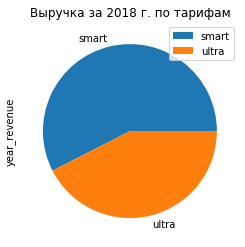

In [68]:
year_revenue.plot(y = 'year_revenue', kind = 'pie', grid=True, title='Выручка за 2018 г. по тарифам')

### Таблица "Количество звонков, минут, смс-сообщений, интернет-трафика и выручки за весь 2018 год"

In [69]:
report.groupby('tariff_name')[['calls_count', 'calls_sum', 'sms_count', 'internet', 'month_revenue']].agg('sum')

,calls_count,calls_sum,sms_count,internet,month_revenue
tariff_name,,,,,
smart,104646.0,931577.0,74413.0,36174861.0,2748486
ultra,58348.0,518724.0,48623.0,19194598.0,2029556


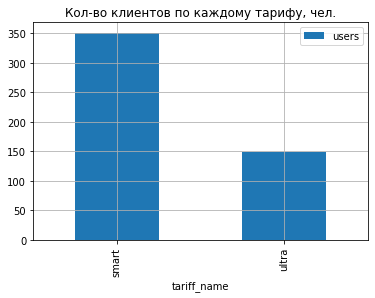

In [70]:
year_revenue.plot(y = 'users', kind = 'bar', grid=True, title='Кол-во клиентов по каждому тарифу, чел.')

### Из данной выборки 500 человек большинство пользуются тарифом Смарт, это 351 человек или 70% от всего количества. Тариф Ультра используют 149 человек или 30%. Также по годовой выручке за 2018 г. больше всего дохода принес тариф Смарт 2 748 486 рублей, выручка по трафику Ультра 2 029 556 рублей. Хотя абонентская плата по тарифу Ультра 1950 руб. в месяц в три с половиной раза выше чем абонентская плата по тарифу Смарт 550 руб. в месяц. За 2018 г. через тариф Смарт, больше всего совершено звонков, отправлено смс и использовано интернет-трафика, и, как следствие, большую часть выручки получено от тарифа Смарт.

<a id="step3"></a>
## Шаг 3. Анализ данных
Поведение клиентов оператора, исходя из выборки.

Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? 

Посчитаем среднее количество, дисперсию и стандартное отклонение.

Построим гистограммы. Опишем распределения.


In [71]:
smart_df = report.query('tariff_name == "smart"')

In [72]:
ultra_df = report.query('tariff_name == "ultra"')

### По каждому тарифу посмотрим среднее, медиану, стандартное отклонение, количество наблюдений в выборке и разброс их значений

In [73]:
# Тариф Смарт:
smart_df[['calls_sum', 'sms_count', 'internet', 'month_revenue']].describe()

,calls_sum,sms_count,internet,month_revenue
count,2229.000000,2229.000000,2229.000000,2229.000000
mean,417.934948,33.384029,16229.188425,1233.057873
std,190.313730,28.227876,5877.576978,787.544032
min,0.000000,0.000000,0.000000,550.000000
25%,282.000000,10.000000,12658.000000,550.000000
50%,422.000000,28.000000,16531.000000,959.000000
75%,545.000000,51.000000,20068.000000,1668.000000
max,1435.000000,143.000000,38610.000000,6711.000000


In [74]:
# Тариф Ультра:
ultra_df[['calls_sum', 'sms_count', 'internet', 'month_revenue']].describe()

,calls_sum,sms_count,internet,month_revenue
count,985.000000,985.000000,985.000000,985.000000
mean,526.623350,49.363452,19486.901523,2060.462944
std,317.606098,47.804457,10096.317202,356.187378
min,0.000000,0.000000,0.000000,1950.000000
25%,284.000000,6.000000,11785.000000,1950.000000
50%,518.000000,38.000000,19324.000000,1950.000000
75%,752.000000,79.000000,26863.000000,1950.000000
max,1673.000000,224.000000,49789.000000,4743.000000


### Из описаний видно, что по тарифу Смарт:
- среднемесячная длительность минут разговора составляет 418 минут, медиана составила 422 минуты, в среднем большинство клиентов входит в ежемесячный лимит до 500 минут;
- смс сообщений в среднем по медиане отправляют 28 штук в месяц, входят в лимит до 50 сообщений;
- по интернет-трафику медиана составила 16531 мб., что превышает ежемесячный лимит в 15360 мб.;
- среднемесячная выручка по клиенту составила 959 руб., превышение абонентской платы 550 р. на 409 руб. Максимальная выручка с одного клиента за один месяц составила 6711 руб.

### по тарифу Ультра:
- среднемесячная длительность минут разговора составляет 527 минут, медиана составила 518 минут, в среднем клиенты входят в лимит до 3000 минут;
- смс сообщений в среднем по медиане отправляют 38 штук в месяц, входят в лимит до 1000 сообщений;
- по интернет-трафику медиана составила 19324 мб., входят в ежемесячный лимит до 30 Гб.;
- среднемесячная выручка по клиенту составила ровно 1950 руб., соответствует абонентской плате 1950 р. в месяц. Максимальная выручка с одного клиента за один месяц составила 4743 руб.


In [75]:
# посмотрим медиану, стандартное отклонение и дисперсию по минутам, смс-сообщениям, интернет-трафику и выручке в месяц

df_stat = report.pivot_table(index=['tariff_name'], values=['calls_sum', 'sms_count', 'internet', 'month_revenue'], 
                    aggfunc={'calls_sum': [np.median, np.var, np.std],
                             'sms_count': [np.median, np.var, np.std], 
                             'internet': [np.median, np.var, np.std],
                            'month_revenue': [np.median]})
df_stat

calls_sum                            internet                \
               median         std            var   median           std   
tariff_name                                                               
smart           422.0  190.313730   36219.315784  16531.0   5877.576978   
ultra           518.0  317.606098  100873.633397  19324.0  10096.317202   

                          month_revenue sms_count                          
                      var        median    median        std          var  
tariff_name                                                                
smart        3.454591e+07           959      28.0  28.227876   796.812958  
ultra        1.019356e+08          1950      38.0  47.804457  2285.266143

### Из данной таблицы видно, что по тарифу Ультра среднемесячная медиана, стандартное отклонение и дисперсия по минутам, смс и интернет-трафику значительно превышают такие же показатели тарифа Смарт. Большой разброс этих значений по тарифу Ультра говорит о том, что клиенты тарифа Ультра более свободны в потреблении телекоммуникационных услуг. Использование дорогого тарифа c большим лимитом по услугам дает возможность не думать о том, что в какой-то момент у них отключится интернет или закончится пакет по минутам разговора. Среднемесячная стоимость по медиане для пользователей тарифа Ультра составляет 1950 руб. в месяц, для пользователей по тарифу Смарт 959 руб. в месяц.

Text(0, 0.5, 'кол-во звонков')

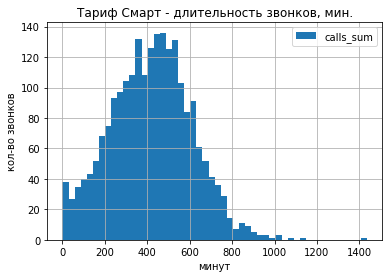

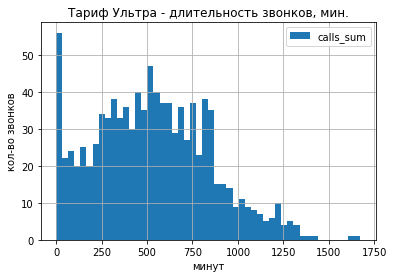

In [76]:
calls_smart = smart_df.plot(y = 'calls_sum', kind = 'hist', bins = 50, grid=True, title='Тариф Смарт - длительность звонков, мин.')
calls_smart.set_xlabel('минут')
calls_smart.set_ylabel('кол-во звонков')
calls_ultra = ultra_df.plot(y = 'calls_sum', kind = 'hist', bins = 50, grid=True, title='Тариф Ультра - длительность звонков, мин.')
calls_ultra.set_xlabel('минут')
calls_ultra.set_ylabel('кол-во звонков')

#### По гистограмме длительности звонков по тарифу Смарт видно, что большая часть клиентов разговаривают в месяц в диапазоне от 200 до 600 минут, т.е. стараются уложить в ежемесячный лимит. По тарифу Ультра диапазон от 250 до 800 минут.

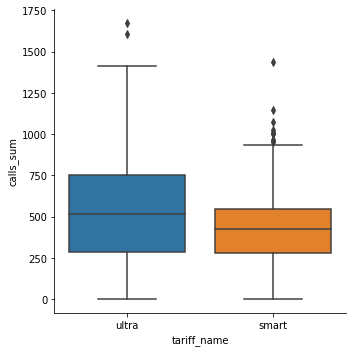

In [77]:
sns.catplot(x='tariff_name', y='calls_sum', kind='box', data=report, orient='v')

#### Из диаграммы размаха по минутам  видим, что медиана по тарифу Смарт составила 422 минуты, по тарифу Ультра 518 минут.

Text(0, 0.5, 'кол-во СМС')

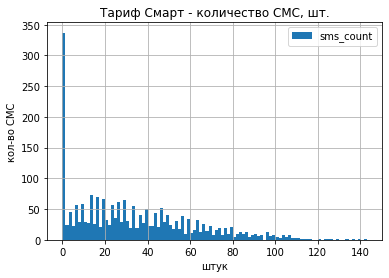

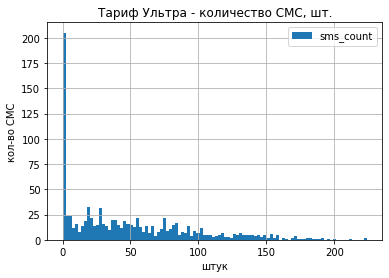

In [78]:
sms_smart = (
    smart_df
    .plot(y = 'sms_count', kind = 'hist', bins = 100, grid=True, title='Тариф Смарт - количество СМС, шт.')
)
sms_smart.set_xlabel('штук')
sms_smart.set_ylabel('кол-во СМС')
sms_ultra = (
    ultra_df
    .plot(y = 'sms_count', kind = 'hist', bins = 100, grid=True, title='Тариф Ультра - количество СМС, шт.')
)
sms_ultra.set_xlabel('штук')
sms_ultra.set_ylabel('кол-во СМС')

#### По гистограмме смс-сообщений видим что по всем тарифам очень большое количество ноль сообщений в месяц. Очень много клиентов вообще не отправляют смс-сообщения. В связи с появлением большого количества мессенджеров через интернет, клиенты все реже используют смс-сообщения. По тарифу Смарт медиана смс-сообщений в месяц составляет 28 смс при лимите 50 смс-сообщений. По тарифу Ультра медиана 38 смс, при лимите 1000 смс в месяц.

Text(0, 0.5, 'кол-во выходов в интернет')

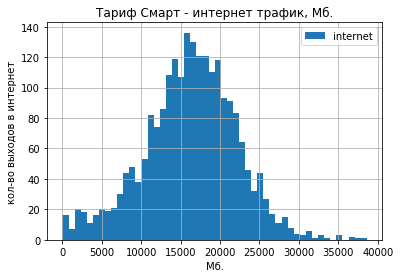

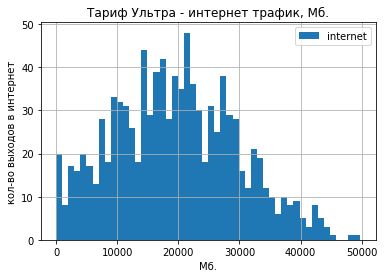

In [79]:
int_smart = smart_df.plot(y = 'internet', kind = 'hist', bins = 50, grid=True, title='Тариф Смарт - интернет трафик, Мб.')
int_smart.set_xlabel('Мб.')
int_smart.set_ylabel('кол-во выходов в интернет')
int_ultra = ultra_df.plot(y = 'internet', kind = 'hist', bins = 50, grid=True, title='Тариф Ультра - интернет трафик, Мб.')
int_ultra.set_xlabel('Мб.')
int_ultra.set_ylabel('кол-во выходов в интернет')

#### Клиенты с тарифом Смарт в среднем в месяц используют от 12 до 22 Гб трафика. Медиана равна 16,5 Гб, что вылезает за пределы, установленные абонентской платой - в 15 Гб. Фактически, клиенты тарифа Смарт регулярно заказывают доп. пакеты с интернетом, когда основной пакет заканчивается. Клиенты с тарифом Ультра используют от 10 до 30 Гб трафика, медиана равна 19 Гб, но учитывая лимит в 30 Гб, у них есть ещё большой запас по количеству оставшегося для использования трафика.

Text(0, 0.5, 'кол-во выручек')

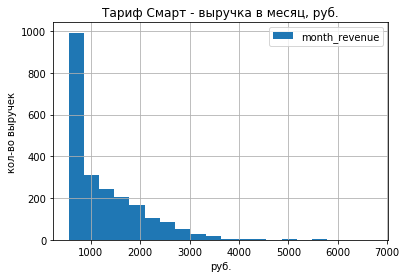

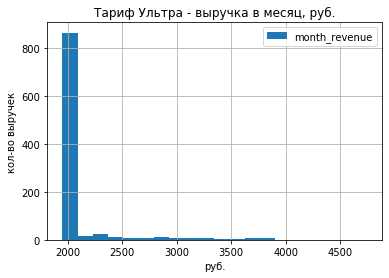

In [80]:
rev_smart = smart_df.plot(y = 'month_revenue', kind = 'hist', bins = 20, grid=True, title='Тариф Смарт - выручка в месяц, руб.')
rev_smart.set_xlabel('руб.')
rev_smart.set_ylabel('кол-во выручек')
rev_ultra = ultra_df.plot(y = 'month_revenue', kind = 'hist', bins = 20, grid=True, title='Тариф Ультра - выручка в месяц, руб.')
rev_ultra.set_xlabel('руб.')
rev_ultra.set_ylabel('кол-во выручек')

Text(0.5, 1.0, 'Диаграмма размаха среднемес. выручки по тарифу Смарт на одного клиента, руб.')

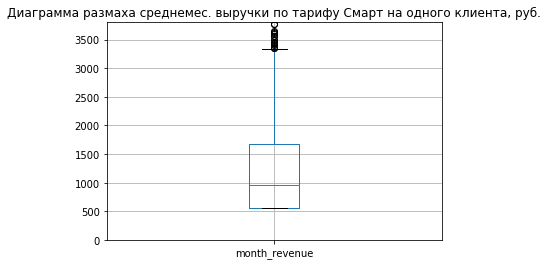

In [81]:
smart_df.boxplot(['month_revenue'])
plt.ylim(0, 3800)
plt.title('Диаграмма размаха среднемес. выручки по тарифу Смарт на одного клиента, руб.')

Text(0.5, 1.0, 'Диаграмма размаха среднемес. выручки по тарифу Ультра на одного клиента, руб.')

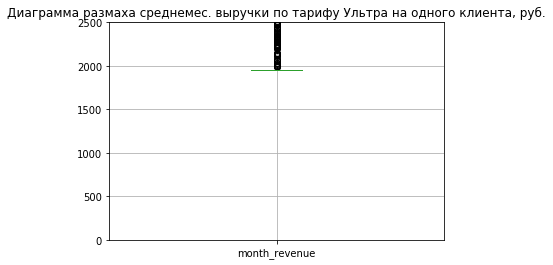

In [82]:
ultra_df.boxplot(['month_revenue'])
plt.ylim(0, 2500)
plt.title('Диаграмма размаха среднемес. выручки по тарифу Ультра на одного клиента, руб.')

#### Клиенты с тарифом Смарт в среднем в месяц тратят от 550 до 1500 руб. Медиана равна 959 руб., что превышает абонентскую плату 550 руб. на 409 руб. или на 74,4%. Фактически, клиенты тарифа Смарт регулярно докупают дополнительные пакеты услуг (в основном интернет-трафик), когда основной пакет услуг заканчивается. Клиенты с тарифом Ультра тратят в большинстве ровно 1950 руб. в месяц, так как лимиты по дорогому пакету услуг достаточные.

<a id="step4"></a>
## Шаг 4. Проверка гипотез

#### Две гипотезы:

#### 1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;

#### 2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;


#### 1. Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различается:

H0 (нулевая гипотеза) - средняя выручка пользователей тарифа «Ультра» равна средней выручке пользователей тарифа «Смарт».

H1 (альтернативная гипотеза) - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

Уровень критической значимости возьмем общепринятую α = 5%

In [83]:
smart_mean = smart_df['month_revenue']

In [84]:
ultra_mean = ultra_df['month_revenue']

In [85]:
from scipy import stats as st

alpha = .05

# Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей
# по взятым из них выборкам, применим метод st.ttest_ind:

results = st.ttest_ind(smart_mean, ultra_mean)

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  8.2203157605818e-191
Отвергаем нулевую гипотезу


#### Отвергаем нулевую гипотезу. Так как средняя выручка пользователей тарифов Смарт и Ультра различаются. Смотрим следующую таблицу по среднемесячной выручке с одного клиента по тарифам:

In [86]:
report.pivot_table(index='tariff_name', values='month_revenue', aggfunc='median')

,month_revenue
tariff_name,
smart,959
ultra,1950


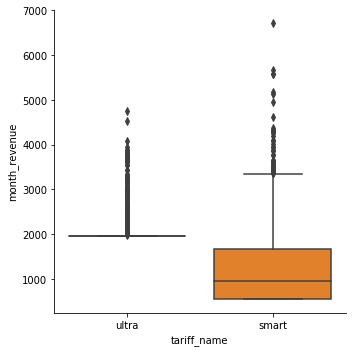

In [87]:
sns.catplot(x='tariff_name', y='month_revenue', kind='box', data=report, orient='v')

#### Из таблицы и диаграммы размаха видно, что медиана выручки по тарифу Ультра составила 1950 руб., по тарифу Смарт 959 руб., что больше в два с лишним раза на 991 руб.

#### 2. Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов:


H0(нулевая гипотеза)  — средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.

H1(альтеранативная гипотеза)  — средняя выручка пользователей из Москвы отличается от средней выручке пользователей из других регионов.

Уровень критической значимости возьмем общепринятую α = 5%

In [88]:
moscow = report.query('city == "Москва"')['month_revenue']

In [89]:
regions = report.query('city != "Москва"')['month_revenue']

In [90]:
alpha = .05

# Чтобы проверить гипотезу о равенстве среднего
# двух генеральных совокупностей по взятым из них выборкам, применим метод st.ttest_ind:

results = st.ttest_ind(
    moscow, 
    regions)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.4741107329003996
Не получилось отвергнуть нулевую гипотезу


#### Не получилость отвергнуть нулевую гипотезу. Т.е. значит cреднемесячная выручка пользователей из Москвы не отличается от выручки пользователей из других регионов. Если бы отклонили нулевую гипотезу и утверждали бы, что доходы "Мегалайна" в Москве значительно отличаются от доходов в других регионах, то с вероятностью 47,4% ошиблись. Посмотрим среднемесячную выручку с одного клиента по Москве и по регионам:

In [91]:
def rep_region(city):
    if city == 'Москва':
        return 'Москва'
    else:
        return 'Другой регион'
    
report['region'] = report['city'].apply(rep_region)

region_revenue = report.pivot_table(index='region', values='month_revenue', aggfunc=['median'])
region_revenue.columns = ['median_revenue']
region_revenue

,median_revenue
region,
Другой регион,1518
Москва,1704


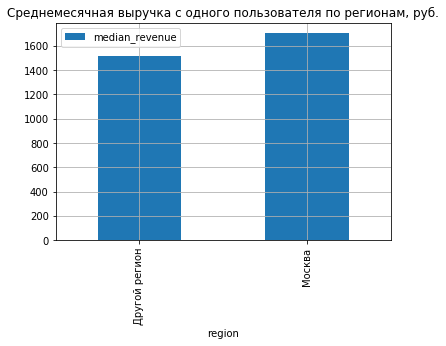

In [92]:
region_revenue.plot(y = 'median_revenue', kind = 'bar',
                    grid=True, title='Среднемeсячная выручка с одного пользователя по регионам, руб.')

#### Из таблицы и графика видно, что медиана среднемесячной выручки в Москве составила 1704 руб., во всех других регионах страны 1518 руб. Слишком большой разницы не имеется.

<a id="step5"></a>
## Шаг 5. Общий вывод

В компании «Мегалайн» - федеральный оператор сотовой связи проведено исследование двух тарифных планов: «Смарт» и «Ультра». Для Коммерческого департамента компании, чтобы скорректировать рекламный бюджет, определяли какой тариф приносит больше денег.

Сделан предварительный анализ тарифов на небольшой выборке клиентов. В распоряжении были данные 500 пользователей «Мегалайна» с информацией: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Проанализировали поведение клиентов, чтобы сделать вывод — какой тариф лучше.

Сперва открыли файлы с данными и изучили общую информацию. Получили 5 разных таблиц со следующей информацией:
- 1. Таблица users (информация о пользователях)
- 2. Таблица calls (информация о звонках)
- 3. Таблица messages (информация о сообщениях)
- 4. Таблица internet (информация об интернет-сессиях)
- 5. Таблица tariffs (информация о тарифах)

Затем привели данные к нужным типам, нашли и исправли ошибки в данных. В информации о звонках и информации об интернет-сессиях округлили вверх значени, и удалили большое количество значений с нулевыми данными, так как их отсутствие не повлияет на результаты анализа.

Посчитали для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычли бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножили на значение из тарифного плана; прибавили абонентскую плату, соответствующую тарифному плану).

Проанализировали данные, описали поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. Посчитали среднее количество, дисперсию и стандартное отклонение. Построили гистограмму с описанием распределения.

Также проверили гипотезы:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

#### Главные выводы - какой тариф приносит больше денег:
- За 2018 г. больше всего выручки принес тариф Смарт 2748486 рублей или 58% от общей выручки, выручка по тарифу Ультра составила 2029556 рублей или 42% от общей выручки. Несмотря на то, что абонентская плата по тарифу Ультра 1950 руб. в месяц в три с половиной раза выше, чем абонентская плата по тарифу Смарт 550 руб. в месяц.
- Из данной выборки 500 человек большинство пользуются тарифом Смарт, это 351 человек или 70% от всего количества. Тариф Ультра используют 149 человек или 30%.
- В 2018 г. по данной выборке через тариф Смарт больше всего совершено звонков, отправлено смс и использовано интернет-трафика, и, как следствие, большую часть выручки принес тариф Смарт.
- Пользователям тарифа «Смарт» не хватает услуг в рамках тарифного пакета (в основном интернет): кроме абонентской платы пользователи в среднем доплачивают еще 409 рублей ежемесячно (+74,4%).
- Большинство пользователей тарифа «Ультра», не используют тарифный пакет в полном объеме.

Дополнительно выяснили:
- Средняя выручка пользователей тарифов Смарт и Ультра значительно различаются. Среднемесячная выручка с одного клиента по медиане по тарифу Смарт составила 959 рублей, по тарифу Ультра 1950 рублей;
- Cреднемесячная выручка пользователей из Москвы не отличается от выручки пользователей из других регионов. При утверждении, что доходы "Мегалайна" в Москве с одного клиента значительно отличаются от доходов в других регионах, то с вероятностью 47,4% произойдет ошибка. Средняя выручка в месяц с одного клиента в Москве в 2018 г. составила 1704 руб., по остальным регионам страны 1518 руб. Разница не значительная.

Рекомендации:
- Среднемесячная выручка с одного клиента по медиане по тарифу Смарт составила 959 рублей, это значит, что эти деньги клиент готов тратить в месяц в качестве абонентской платы. Поэтому можно рассмотреть вариант повышения абонентской платы по тарифу Смарт или вариант создания нового промежуточного тарифа между Смарт и Ультра, на базе тарифа Смарт под условным названием "Смарт+", где будет больший пакет интернет-трафика примерно до 18 Гб (меньше медианы интернет-трафика 19 Гб по тарифу Ультра, чтобы не было оттока) с абонентской платой 950 рублей.